Import delle librerie e assegnazione dei path del dataset

In [1]:
from scipy import stats

In [2]:
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
import pandas as pd

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [313]:
dataset = 'data.xlsx'

Import dei 3 file excel come pandas dataframe importando solo il foglio di lavoro "Reults".

In [314]:
df_original = pd.read_excel(dataset, sheet_name='Results')


Esplorazione dei dati partendo dal dataset relativo alle banche quotate:

In [315]:
df = df_original.copy()
df.drop(df.columns[df.columns.str.contains('unnamed',case=False)], inplace=True, axis=1)

In [316]:
print(f"Il database contiene: {df.shape[0]} banche e {df.shape[1]} colonne")

Il database contiene: 338 banche e 15 colonne


Le colonne presenti sono:

In [317]:
# Nome colonne
for i, col in enumerate(df.columns):
    print(i+1, "\t", repr(col))

1 	 'Company name Latin alphabet'
2 	 'ISIN number'
3 	 'Total assets\nth EUR 2019'
4 	 'Total equity / Total assets (%)\n2019'
5 	 'Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019'
6 	 'Impaired loans / Gross customer loans & advances (%)\n2019'
7 	 'Return on average equity (ROAE) (%)\n2019'
8 	 'Return on average assets (ROAA) (%)\n2019'
9 	 'Net interest margin (interest earning assets) (%)\n2019'
10 	 'Net interest margin (average interest earning assets) (%)\n2019'
11 	 'Liquid assets / Total assets (%)\n2019'
12 	 'Cost to income (Efficiency) ratio (%)\n2019'
13 	 'Country ISO code'
14 	 'Consolidation code'
15 	 'BvD ID number'


In [318]:
df.head(3)

,Company name Latin alphabet,ISIN number,Total assets\nth EUR 2019,Total equity / Total assets (%)\n2019,Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019,Impaired loans / Gross customer loans & advances (%)\n2019,Return on average equity (ROAE) (%)\n2019,Return on average assets (ROAA) (%)\n2019,Net interest margin (interest earning assets) (%)\n2019,Net interest margin (average interest earning assets) (%)\n2019,Liquid assets / Total assets (%)\n2019,Cost to income (Efficiency) ratio (%)\n2019,Country ISO code,Consolidation code,BvD ID number
0,"A&G BANCA PRIVADA, S.A.",NaN,456129.126,6.457051,n.a.,n.a.,6.604585,0.43996,1.073123,1.136454,36.062378,85.373749,ES,U2,ESA87020566
1,AB SEB BANKAS,LT0000101347,8541274,9.125196,1.796713,1.803825,15.218594,1.435209,2.002216,1.990385,23.972642,34.522417,LT,U2,LT112021238
2,ABANCA CORPORACION BANCARIA SA,ES0165936008,58971549,7.356876,3.213824,2.663304,8.390346,0.653822,1.067505,1.134893,14.616253,87.818434,ES,U2,ESA70302039



Si procede quindi con l'eliminare le colonne che non verranno utilizzate:

In [321]:
to_be_dropped = ["BvD ID number",
                 "Consolidation code",
                 "Net interest margin (interest earning assets) (%)\n2019"]

df.drop(to_be_dropped, inplace=True, axis=1)

E con il rinominare le colonne con nomi di più facile comprensione

In [322]:
df.rename(columns={"Company name Latin alphabet":"Bank name",
                    "Total assets\nth EUR 2019":"Total assets",
                    "Total equity / Total assets (%)\n2019":"Tot Equity/Assets",
                    "Lagged impaired loans (Impaired loans % prior year gross customer loans & advances) (%)\n2019":"1y Lagged Impaired Ratio",
                    "Impaired loans / Gross customer loans & advances (%)\n2019":"Imp Loans/Gross Loans",
                    "Return on average equity (ROAE) (%)\n2019":"ROAE",
                    "Return on average assets (ROAA) (%)\n2019":"ROAA",
                    "Net interest margin (average interest earning assets) (%)\n2019":"NIM (average)",
                    "Liquid assets / Total assets (%)\n2019":"Liquid assets / Total assets",
                    "Cost to income (Efficiency) ratio (%)\n2019":"CINC Ratio"}, inplace=True)

In [323]:
for i, col in enumerate(df.columns):
    print(i+1, "\t", repr(col))

1 	 'Bank name'
2 	 'ISIN number'
3 	 'Total assets'
4 	 'Tot Equity/Assets'
5 	 '1y Lagged Impaired Ratio'
6 	 'Imp Loans/Gross Loans'
7 	 'ROAE'
8 	 'ROAA'
9 	 'NIM (average)'
10 	 'Liquid assets / Total assets'
11 	 'CINC Ratio'
12 	 'Country ISO code'


# Quotate
Si procede quindi con l'eliminazione delle banche che presentano NaN in 'ISIN Number' per creare il database delle banche quotate (ovvero quelle che hanno un ISIN) 

In [324]:
quot = df.dropna(subset=['ISIN number'], axis=0)
print(f"Il database contiene: {quot.shape[0]} banche e {quot.shape[1]} colonne")
quot.head()

Il database contiene: 125 banche e 12 colonne


,Bank name,ISIN number,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM (average),Liquid assets / Total assets,CINC Ratio,Country ISO code
1,AB SEB BANKAS,LT0000101347,8541274,9.125196,1.796713,1.803825,15.218594,1.435209,1.990385,23.972642,34.522417,LT
2,ABANCA CORPORACION BANCARIA SA,ES0165936008,58971549,7.356876,3.213824,2.663304,8.390346,0.653822,1.134893,14.616253,87.818434,ES
3,ABN AMRO BANK NV,NL0011540547,384832000,5.579318,n.a.,n.a.,9.554497,0.526264,1.155136,64.118369,72.860963,NL
7,AIB GROUP PUBLIC LIMITED COMPANY,IE00BF0L3536,13842000,72.149978,n.a.,n.a.,n.a.,n.a.,n.a.,27.532149,n.a.,IE
9,AKTIA BANK PLC,FI4000058870,8383016,3.988242,0.837494,0.796611,15.618683,0.620197,1.016978,16.166318,67.214597,FI


In [325]:
cols = quot.columns.drop(["Bank name", "ISIN number", "Country ISO code"])
quot[cols] = quot[cols].apply(pd.to_numeric, errors="coerce")
total = quot.shape[0]
print(quot.isna().sum()/total*100)
quot.dropna(subset=cols, axis=0, inplace=True)



Bank name                        0.0
ISIN number                      0.0
Total assets                     8.0
Tot Equity/Assets                8.0
1y Lagged Impaired Ratio        25.6
Imp Loans/Gross Loans           24.8
ROAE                            17.6
ROAA                            17.6
NIM (average)                   17.6
Liquid assets / Total assets     8.0
CINC Ratio                      16.8
Country ISO code                 0.0
dtype: float64


/Users/francesco/opt/anaconda3/envs/tesi/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-325-cd69de491e25>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quot.dropna(subset=cols, axis=0, inplace=True)


In [326]:
quot.describe()

,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM (average),Liquid assets / Total assets,CINC Ratio
count,8.800000e+01,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,1.016098e+08,9.405260,8.570306,7.503060,8.650442,0.843045,2.225324,29.296260,65.126239
std,2.338182e+08,3.519667,15.300098,9.942210,8.772922,0.820686,1.454203,14.137809,21.597706
min,1.857188e+05,2.448007,0.075149,0.080625,-22.793473,-1.229795,0.038639,5.289526,34.522417
25%,5.318586e+06,6.736713,2.572466,2.429187,4.575800,0.366060,1.173212,18.524076,51.542315
50%,1.762674e+07,9.375205,4.422391,4.187724,8.881870,0.679328,2.078726,27.290983,60.587309
75%,5.906891e+07,11.756631,8.036450,7.748625,12.834182,1.201755,2.921433,37.626888,70.087860
max,1.429346e+09,17.979961,126.605134,48.771867,34.876677,2.952879,10.409920,69.921573,158.343597


In [367]:
print(f"Il database contiene: {quot.shape[0]} banche e {quot.shape[1]} colonne")

Il database contiene: 88 banche e 12 colonne


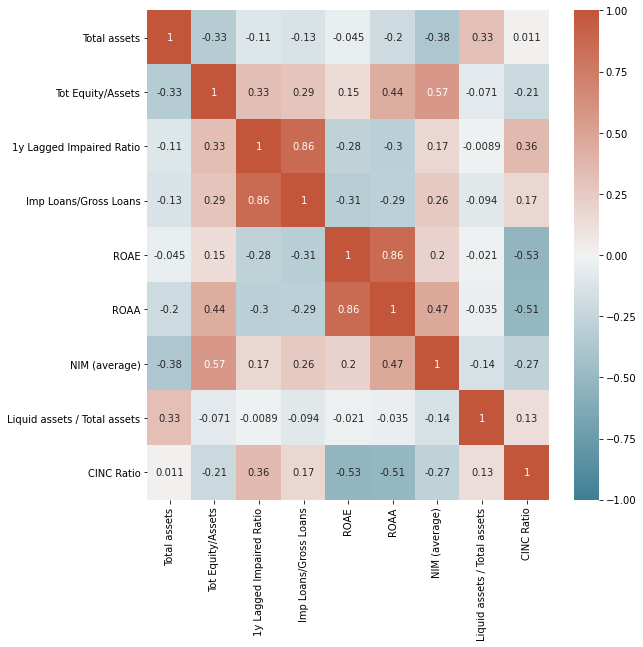

In [369]:
palette = sn.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(9,9))
hm = sn.heatmap(quot.corr(), annot=True, vmin=-1, vmax=1, cmap=palette)
hm.get_figure().savefig("heatmap quotate.png")

Si procede quindi con l'analisi attraverso regressione lineare multivariata

In [397]:
# Non lagged

# Variabili dipendenti
X = quot[['Total assets',
            'Tot Equity/Assets',
            'ROAE',
            'ROAA',
            'NIM (average)',
          'Liquid assets / Total assets',
            'CINC Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = quot["Imp Loans/Gross Loans"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Imp Loans/Gross Loans   R-squared:                       0.441
Model:                               OLS   Adj. R-squared:                  0.392
Method:                    Least Squares   F-statistic:                     9.022
Date:                   Wed, 03 Mar 2021   Prob (F-statistic):           3.68e-08
Time:                           07:43:05   Log-Likelihood:                -300.88
No. Observations:                     88   AIC:                             617.8
Df Residuals:                         80   BIC:                             637.6
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -8.9131      5.171     -1.724      0.089     -19.204       1.378
Total assets                  5.488e-10   4.15e-09      0.132      0.895   -7.71e-09    8.81e-09
Tot Equity/Assets                1.4129      0.322      4.387      0.000       0.772       2.054
ROAE                             0.6895      0.236      2.921      0.005       0.220       1.159
ROAA                           -14.3764      2.800     -5.135      0.000     -19.948      -8.805
NIM (average)                    3.0205      0.791      3.821      0.000       1.447       4.594
Liquid assets / Total assets    -0.0294      0.063     -0.464      0.644      -0.155       0.097
CINC Ratio                       0.0517      0.047      1.096      0.276      -0.042       0.146
==============================================================================
Omnibus:                       33.907   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.176
Skew:                           1.417   Prob(JB):                     1.29e-16
Kurtosis:                       6.454   Cond. No.                     1.62e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [398]:
# Lagged 

# Variabili dipendenti
X = quot[['Total assets',
            'Tot Equity/Assets',
            'ROAE',
            'ROAA',
            'NIM (average)',
          'Liquid assets / Total assets',
            'CINC Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = quot["1y Lagged Impaired Ratio"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     1y Lagged Impaired Ratio   R-squared:                       0.580
Model:                                  OLS   Adj. R-squared:                  0.544
Method:                       Least Squares   F-statistic:                     15.81
Date:                      Wed, 03 Mar 2021   Prob (F-statistic):           7.39e-13
Time:                              07:43:05   Log-Likelihood:                -326.20
No. Observations:                        88   AIC:                             668.4
Df Residuals:                            80   BIC:                             688.2
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -39.2550      6.895     -5.693      0.000     -52.977     -25.533
Total assets                  1.351e-09   5.53e-09      0.244      0.808   -9.66e-09    1.24e-08
Tot Equity/Assets                3.0170      0.429      7.025      0.000       2.162       3.872
ROAE                             1.6620      0.315      5.280      0.000       1.036       2.288
ROAA                           -25.8114      3.733     -6.915      0.000     -33.240     -18.383
NIM (average)                    3.6937      1.054      3.504      0.001       1.596       5.791
Liquid assets / Total assets     0.0051      0.084      0.061      0.952      -0.163       0.173
CINC Ratio                       0.2814      0.063      4.475      0.000       0.156       0.407
==============================================================================
Omnibus:                       23.100   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.649
Skew:                           0.742   Prob(JB):                     6.17e-17
Kurtosis:                       7.261   Cond. No.                     1.62e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
# Nome colonne
for i, col in enumerate(df.columns):
    print(repr(col))

'Bank name'
'ISIN number'
'Total assets'
'Tot Equity/Assets'
'1y Lagged Impaired Ratio'
'Imp Loans/Gross Loans'
'ROAE'
'ROAA'
'NIM (average)'
'Liquid assets / Total assets'
'CINC Ratio'
'Country ISO code'


# Normalizzazione variabili

In [268]:
quot_s = quot
cols = quot_s.columns.drop(["Bank name", "ISIN number", "Country ISO code"])
scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(quot_s[cols]) 
quot_s[cols] = arr_scaled
quot_s.describe()

<ipython-input-268-6752300fb2ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quot_s[cols] = arr_scaled
/Users/francesco/opt/anaconda3/envs/tesi/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM (average),Liquid assets / Total assets,CINC Ratio
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.070968,0.447932,0.067139,0.152439,0.545237,0.495578,0.210840,0.371437,0.247161
std,0.163605,0.226608,0.120921,0.204189,0.152122,0.196211,0.140214,0.218743,0.174427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003592,0.276121,0.019737,0.048234,0.474583,0.381539,0.109396,0.204768,0.137455
50%,0.012204,0.445997,0.034357,0.084350,0.549250,0.456436,0.196705,0.340411,0.210504
75%,0.041201,0.599321,0.062920,0.157482,0.617783,0.581339,0.277959,0.500330,0.287232
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Studio degli outliers

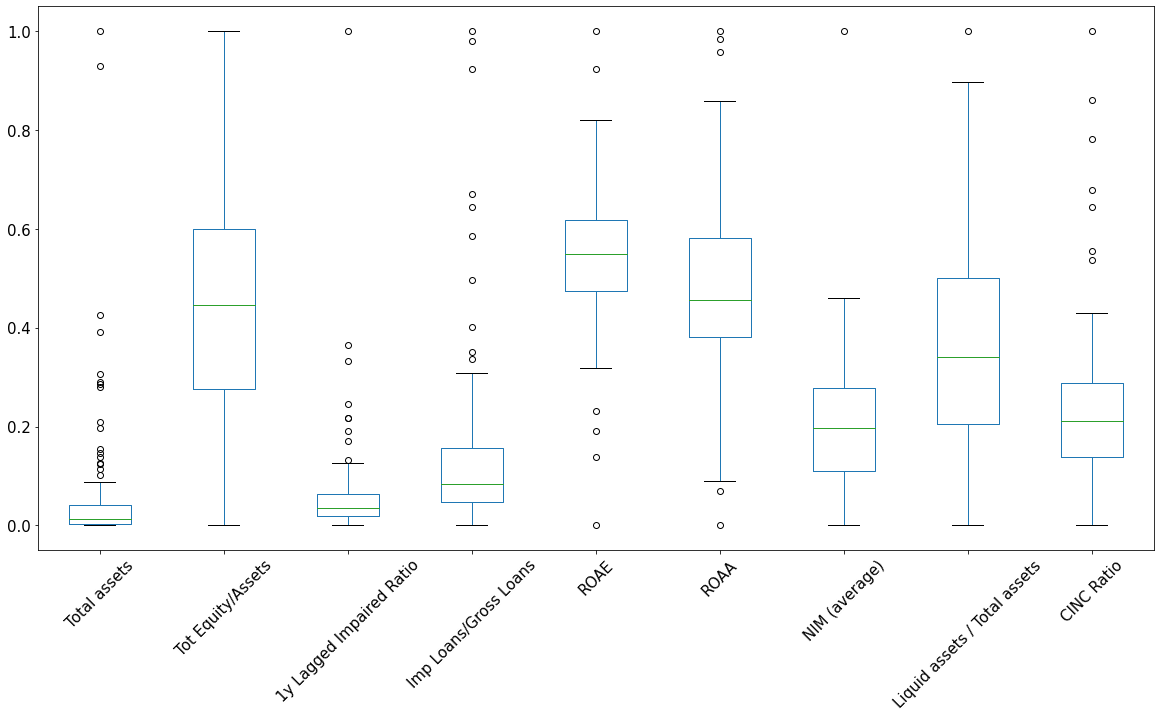

In [269]:
ax = quot_s.plot(kind="box", legend=True, figsize=(20,10), rot=45, fontsize=15)

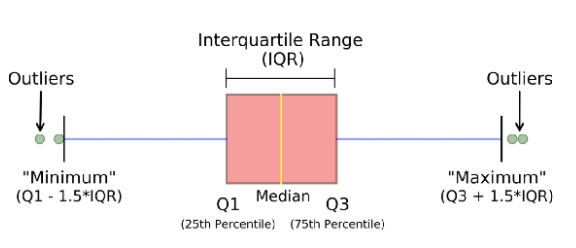

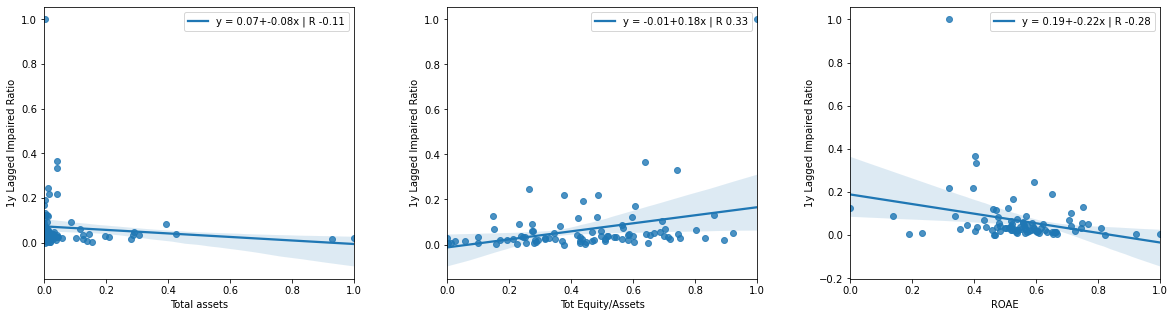

In [270]:
xlist = ['Total assets',
         'Tot Equity/Assets',
         'ROAE']

n=len(xlist)
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=False)
for i, item in enumerate(xlist):
    plt.sca(ax[i])
    x = quot[item]
    y = quot.iloc[:,4] # 1y lagged loans
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    sn.regplot(x=x, y=y, line_kws={'label':"y = {0:.2f}+{1:.2f}x | R {2:.2f}".format(intercept, slope, r_value)})
    plt.legend()

    
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 

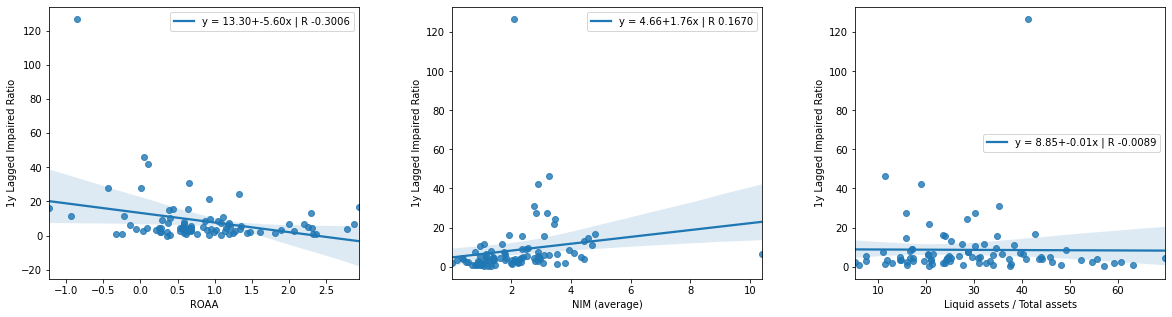

In [388]:
xlist = ['ROAA',
         'NIM (average)',
         'Liquid assets / Total assets']

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=False)
for i, item in enumerate(xlist):
    plt.sca(ax[i])
    x = quot[item]
    y = quot.iloc[:,4] # 1y lagged loans
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    sn.regplot(x=x, y=y, line_kws={'label':"y = {0:.2f}+{1:.2f}x | R {2:.4f}".format(intercept, slope, r_value)})
    plt.legend()

    
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 

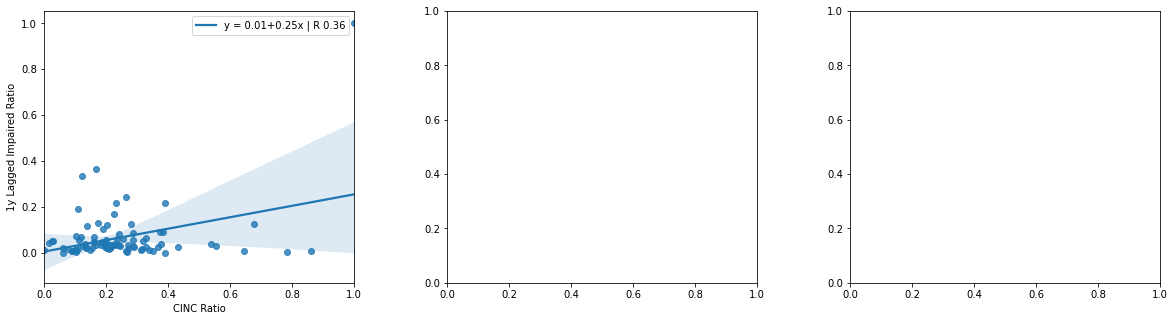

In [272]:
xlist = ['CINC Ratio']

n=len(xlist)
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=False)
for i, item in enumerate(xlist):
    plt.sca(ax[i])
    x = quot[item]
    y = quot.iloc[:,4] # 1y lagged loans
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    sn.regplot(x=x, y=y, line_kws={'label':"y = {0:.2f}+{1:.2f}x | R {2:.2f}".format(intercept, slope, r_value)})
    plt.legend()

    
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 

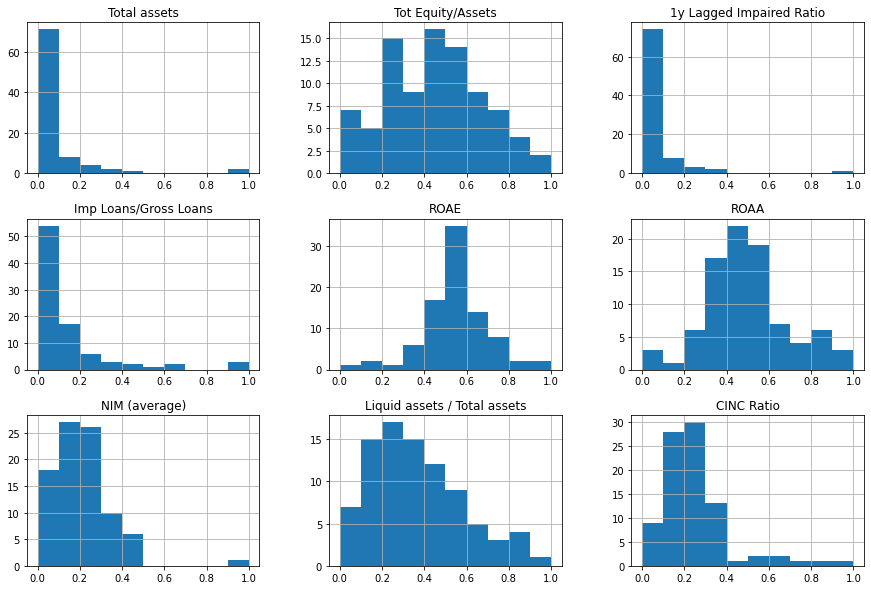

In [301]:
quot.hist(figsize=(15,10))
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 

# Non quotate
Si procede quindi con l'eliminazione delle banche che presentano un 'ISIN Number' per creare il database delle banche non quotate (ovvero quelle che non hanno un ISIN) 

In [399]:
nquot = df[df['ISIN number'].isnull()]
print(f"Il database contiene: {nquot.shape[0]} banche e {nquot.shape[1]} colonne")
nquot.head()

Il database contiene: 213 banche e 12 colonne


,Bank name,ISIN number,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM (average),Liquid assets / Total assets,CINC Ratio,Country ISO code
0,"A&G BANCA PRIVADA, S.A.",NaN,456129.126,6.457051,n.a.,n.a.,6.604585,0.43996,1.136454,36.062378,85.373749,ES
4,ADDIKO BANK D.D. ZAGREB,NaN,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,HR
5,AHLI UNITED BANK (UK) PLC,NaN,2855130.33442,9.276021,n.a.,0.407099,n.a.,n.a.,n.a.,25.745693,n.a.,GB
6,AIB GROUP (UK) PLC,NaN,13612068.81711,14.956238,n.a.,n.a.,n.a.,n.a.,n.a.,35.095246,n.a.,GB
8,AIR BANK AS,NaN,4668660.721878,8.247501,0.819812,0.688336,17.537654,1.331324,3.354946,34.492001,44.432285,CZ


In [400]:
cols = nquot.columns.drop(["Bank name", "ISIN number", "Country ISO code"])
nquot[cols] = nquot[cols].apply(pd.to_numeric, errors="coerce")
total = nquot.shape[0]
print(nquot.isna().sum()/total*100)
nquot.dropna(subset=cols, axis=0, inplace=True)

Bank name                         0.000000
ISIN number                     100.000000
Total assets                     10.328638
Tot Equity/Assets                10.798122
1y Lagged Impaired Ratio         41.784038
Imp Loans/Gross Loans            38.967136
ROAE                             26.760563
ROAA                             25.821596
NIM (average)                    26.760563
Liquid assets / Total assets     10.798122
CINC Ratio                       21.596244
Country ISO code                  0.000000
dtype: float64


/Users/francesco/opt/anaconda3/envs/tesi/lib/python3.8/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-400-be14744075ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nquot.dropna(subset=cols, axis=0, inplace=True)


In [401]:
nquot = nquot[nquot["CINC Ratio"] < 400]

In [402]:
nquot.describe()

,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM (average),Liquid assets / Total assets,CINC Ratio
count,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.965721e+07,10.890778,8.736705,8.993281,5.600768,0.556446,2.821834,32.427320,69.550711
std,5.991615e+07,7.601315,13.320741,14.788061,13.162336,1.427282,2.912149,19.472875,21.800740
min,1.197997e+04,2.423543,0.000000,0.000000,-70.097762,-8.856576,-2.371953,1.827851,33.272395
25%,1.041598e+06,7.029032,2.151514,2.129072,3.364981,0.263400,1.418303,16.924061,53.641955
50%,3.400856e+06,9.474884,4.380765,4.224537,6.956110,0.559042,2.164004,29.275681,67.541455
75%,1.121208e+07,13.296155,10.246933,8.733360,11.234872,1.140657,3.372675,47.392215,80.846484
max,5.250820e+08,60.330930,102.318332,99.169184,44.379149,4.663480,22.936594,90.350331,149.757343


In [403]:
print(f"Il database contiene: {nquot.shape[0]} banche e {nquot.shape[1]} colonne")

Il database contiene: 108 banche e 12 colonne


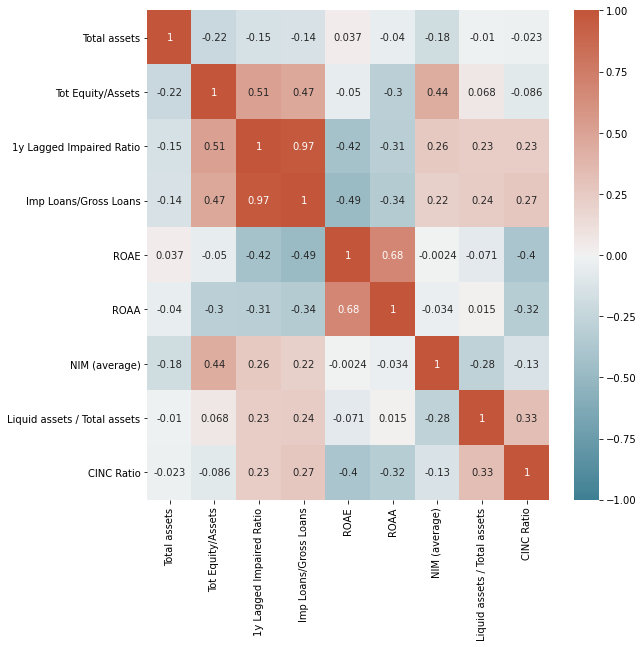

In [404]:
palette = sn.diverging_palette(220, 20, as_cmap=True)
plt.subplots(figsize=(9,9))
hm = sn.heatmap(nquot.corr(), annot=True, vmin=-1, vmax=1, cmap=palette)

Si procede quindi con l'analisi attraverso regressione lineare multivariata

In [408]:
# Non lagged

# Variabili dipendenti
X = nquot[['Total assets',
            'Tot Equity/Assets',
            'ROAE',
            'ROAA',
            'NIM (average)',
          'Liquid assets / Total assets',
            'CINC Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = nquot["Imp Loans/Gross Loans"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Imp Loans/Gross Loans   R-squared:                       0.503
Model:                               OLS   Adj. R-squared:                  0.469
Method:                    Least Squares   F-statistic:                     14.49
Date:                   Wed, 03 Mar 2021   Prob (F-statistic):           6.85e-13
Time:                           09:03:41   Log-Likelihood:                 90.589
No. Observations:                    108   AIC:                            -165.2
Df Residuals:                        100   BIC:                            -143.7
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1887      0.098      1.932      0.056      -0.005       0.382
Total assets                     0.0195      0.097      0.201      0.841      -0.172       0.211
Tot Equity/Assets                0.5522      0.105      5.248      0.000       0.343       0.761
ROAE                            -0.7210      0.133     -5.410      0.000      -0.985      -0.457
ROAA                             0.3114      0.155      2.010      0.047       0.004       0.619
NIM (average)                    0.0834      0.111      0.751      0.455      -0.137       0.304
Liquid assets / Total assets     0.0945      0.056      1.697      0.093      -0.016       0.205
CINC Ratio                       0.0986      0.067      1.474      0.144      -0.034       0.231
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.493
Skew:                           1.917   Prob(JB):                     1.39e-68
Kurtosis:                      10.399   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [406]:
# Lagged 

# Variabili dipendenti
X = nquot[['Total assets',
            'Tot Equity/Assets',
            'ROAE',
            'ROAA',
            'NIM (average)',
          'Liquid assets / Total assets',
            'CINC Ratio']]
X = sm.add_constant(X) # theta0 = 1

# Variabile indipendente
y = nquot["1y Lagged Impaired Ratio"]

# Genera OLS Model
est = sm.OLS(y, X).fit()
# Genera summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     1y Lagged Impaired Ratio   R-squared:                       0.491
Model:                                  OLS   Adj. R-squared:                  0.456
Method:                       Least Squares   F-statistic:                     13.79
Date:                      Wed, 03 Mar 2021   Prob (F-statistic):           2.19e-12
Time:                              07:44:38   Log-Likelihood:                -395.90
No. Observations:                       108   AIC:                             807.8
Df Residuals:                           100   BIC:                             829.3
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -8.8849      4.383     -2.027      0.045     -17.581      -0.189
Total assets                  4.205e-09   1.67e-08      0.252      0.801   -2.88e-08    3.73e-08
Tot Equity/Assets                0.9071      0.164      5.521      0.000       0.581       1.233
ROAE                            -0.5038      0.105     -4.785      0.000      -0.713      -0.295
ROAA                             2.1051      1.036      2.031      0.045       0.049       4.161
NIM (average)                    0.4528      0.397      1.141      0.256      -0.334       1.240
Liquid assets / Total assets     0.0994      0.057      1.748      0.084      -0.013       0.212
CINC Ratio                       0.0691      0.052      1.331      0.186      -0.034       0.172
==============================================================================
Omnibus:                       59.014   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.264
Skew:                           1.755   Prob(JB):                     1.71e-65
Kurtosis:                      10.346   Cond. No.                     2.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Normalizzazione variabili

In [407]:
nquot_s = nquot
cols = nquot_s.columns.drop(["Bank name", "ISIN number", "Country ISO code"])
scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(nquot_s[cols]) 
nquot_s[cols] = arr_scaled
nquot_s.describe()

,Total assets,Tot Equity/Assets,1y Lagged Impaired Ratio,Imp Loans/Gross Loans,ROAE,ROAA,NIM (average),Liquid assets / Total assets,CINC Ratio
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.037414,0.146220,0.085387,0.090686,0.661256,0.696227,0.205219,0.345669,0.311442
std,0.114111,0.131267,0.130189,0.149120,0.114978,0.105568,0.115066,0.219977,0.187155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001961,0.079532,0.021028,0.021469,0.641725,0.674552,0.149762,0.170535,0.174869
50%,0.006454,0.121769,0.042815,0.042599,0.673095,0.696419,0.179226,0.310066,0.294193
75%,0.021331,0.187759,0.100148,0.088065,0.710472,0.739437,0.226984,0.514721,0.408414
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Studio degli outliers

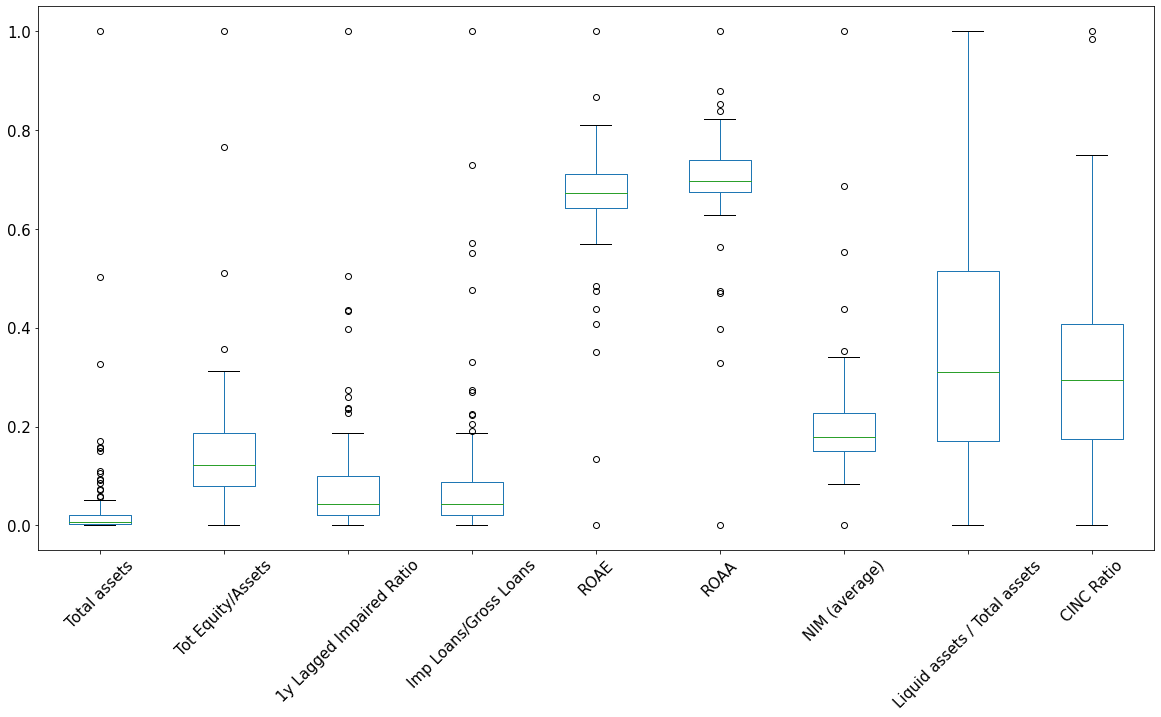

In [394]:
ax = nquot_s.drop("ISIN number",axis=1).plot(kind="box", legend=True, figsize=(20,10), rot=45, fontsize=15)

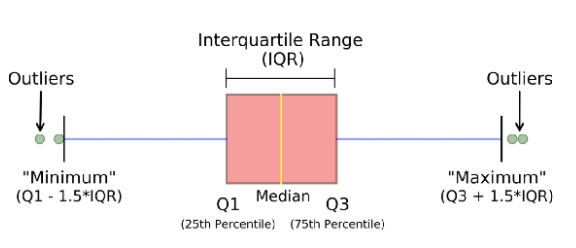

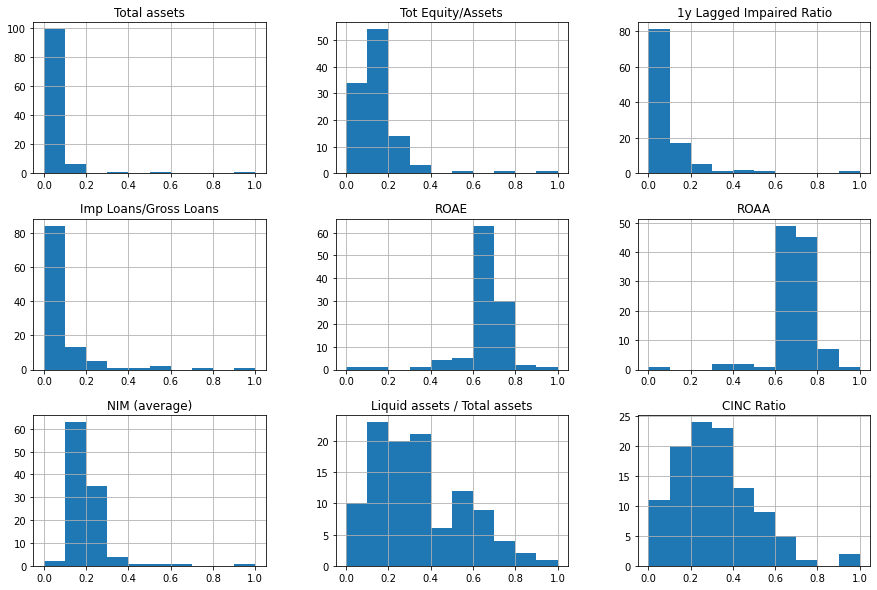

In [284]:
nquot_s.hist(figsize=(15,10))
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 

In [378]:
var = "Liquid assets / Total assets"

<AxesSubplot:xlabel='Liquid assets / Total assets', ylabel='Imp Loans/Gross Loans'>

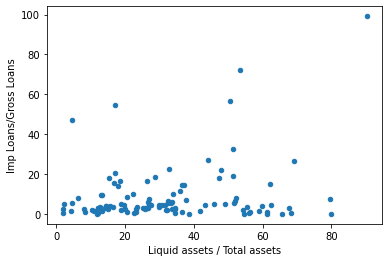

In [385]:
nquot[["Imp Loans/Gross Loans", var]].plot(kind="scatter", y="Imp Loans/Gross Loans", x=var)

<AxesSubplot:ylabel='Density'>

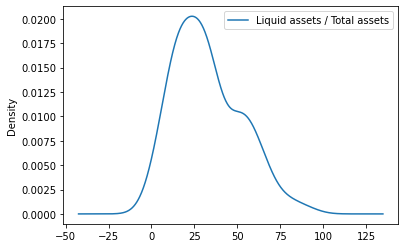

In [380]:
nquot[["Bank name", var]].plot(kind="kde")

<AxesSubplot:ylabel='Density'>

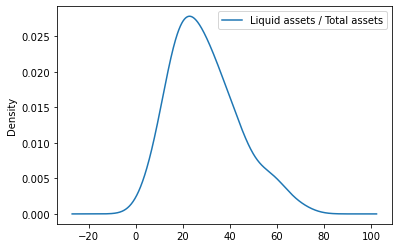

In [381]:
quot[["Bank name", var]].plot(kind="kde")

<AxesSubplot:xlabel='Liquid assets / Total assets', ylabel='Imp Loans/Gross Loans'>

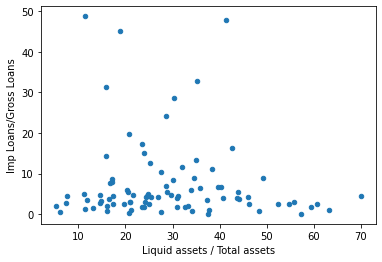

In [384]:
quot[["Imp Loans/Gross Loans", var]].plot(kind="scatter", y="Imp Loans/Gross Loans", x=var)

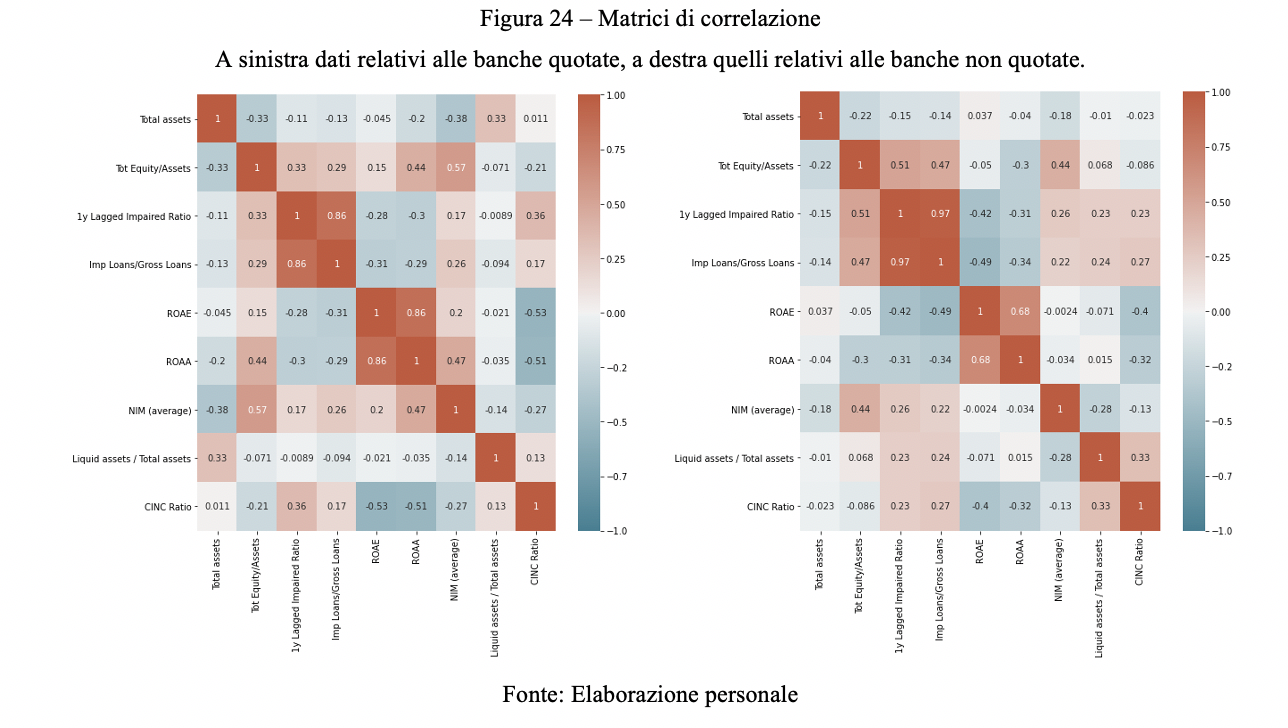

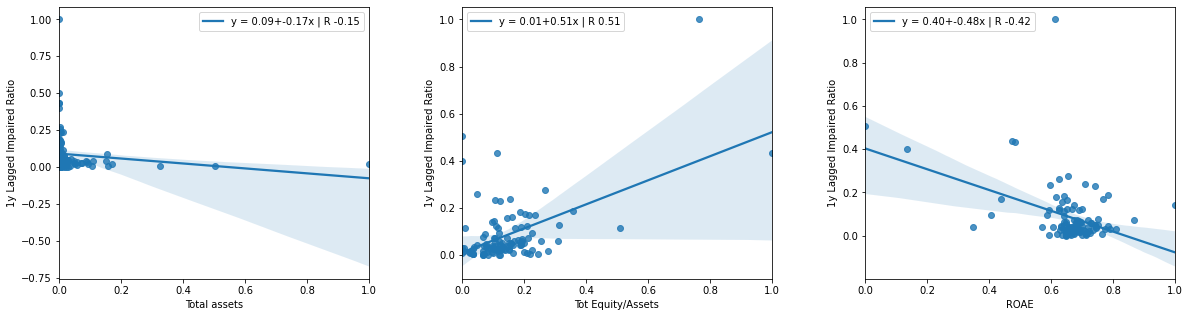

In [285]:
xlist = ['Total assets',
         'Tot Equity/Assets',
         'ROAE']

n=len(xlist)
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=False)
for i, item in enumerate(xlist):
    plt.sca(ax[i])
    x = nquot[item]
    y = nquot.iloc[:,4] # 1y lagged loans
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    sn.regplot(x=x, y=y, line_kws={'label':"y = {0:.2f}+{1:.2f}x | R {2:.2f}".format(intercept, slope, r_value)})
    plt.legend()

    
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 

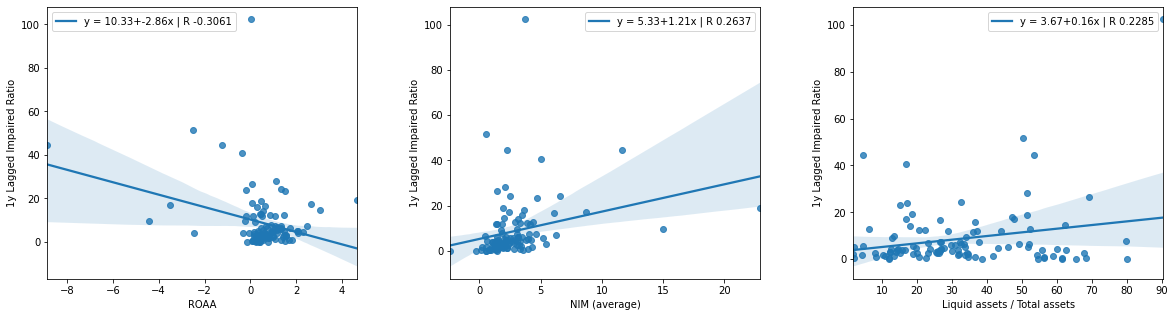

In [389]:
xlist = ['ROAA',
         'NIM (average)',
         'Liquid assets / Total assets']

n=len(xlist)
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=False)
for i, item in enumerate(xlist):
    plt.sca(ax[i])
    x = nquot[item]
    y = nquot.iloc[:,4] # 1y lagged loans
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    sn.regplot(x=x, y=y, line_kws={'label':"y = {0:.2f}+{1:.2f}x | R {2:.4f}".format(intercept, slope, r_value)})
    plt.legend()

    
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 

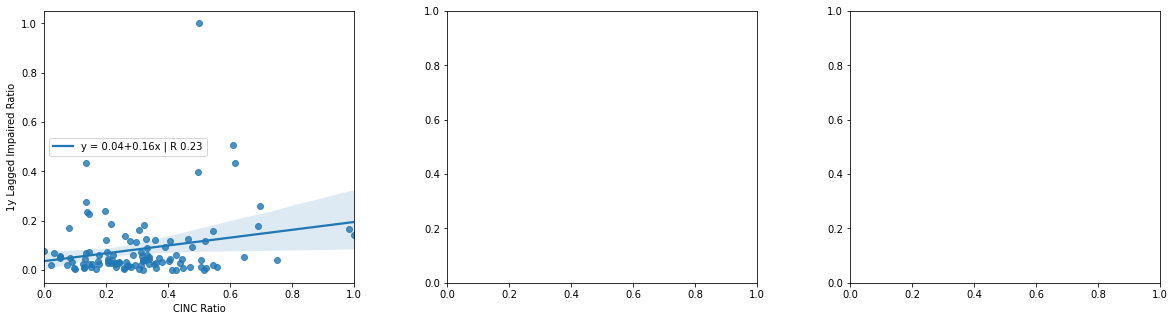

In [287]:
xlist = ['CINC Ratio']

n=len(xlist)
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=False)
for i, item in enumerate(xlist):
    plt.sca(ax[i])
    x = nquot[item]
    y = nquot.iloc[:,4] # 1y lagged loans
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    sn.regplot(x=x, y=y, line_kws={'label':"y = {0:.2f}+{1:.2f}x | R {2:.2f}".format(intercept, slope, r_value)})
    plt.legend()

    
dist = 0.3
plt.subplots_adjust(hspace=dist, wspace=dist) 